##Understanding image normalization, regularization, batch normalization


 
*    **Image normalization**- In image processing, normalization is a process that changes the range of pixel intensity values.

  https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/

  https://machinelearningmastery.com/how-to-normalize-center-and-standardize-images-with-the-imagedatagenerator-in-keras/


 *   **Regularization** -This is a form of regression, that constrains/ regularizes or shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting. 

  https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a


  *   **Batch normalization** -normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

  https://towardsdatascience.com/batch-normalization-in-neural-networks-1ac91516821c
  https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/







###Load required libraries, load mnist data and standardize it, convert labels to encoding format.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import keras.backend as K
from keras.datasets import mnist

(60000, 28, 28)


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

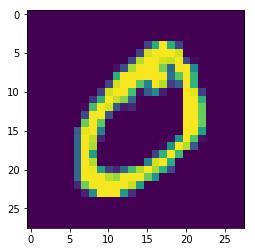

In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])


X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)



X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255



y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)


Y_train[:10]


### session5_assignment5

**Problem statement**
  
  Change the code 8 or your own 4th Code from Assignment 4 to include:

**image normalization** 

  **L2 regularization**

  **ReLU after BN**

  Run your new code for 40 epochs and save the model with highest validation accuracy
  Find out 25 misclassified images from the validation dataset and create an image gallery
  Submit
  
  
 As mentioned in video for l2 regularization should not be added to each layer, we need to define loss function which has penalized loss function.
  
  https://towardsdatascience.com/advanced-keras-constructing-complex-custom-losses-and-metrics-c07ca130a618

**To do image normalization**- https://machinelearningmastery.com/how-to-normalize-center-and-standardize-images-with-the-imagedatagenerator-in-keras/

 *create generator that centers pixel values. 
substract mean and divide by standard deviation*


**datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)**



**To do l2 regularization :-**

There are two steps in implementing a parameterized custom loss function in Keras. First, writing a method for the coefficient/metric. Second, writing a wrapper function to format things the way Keras needs them to be.

[reference example ](https://stackoverflow.com/questions/45961428/make-a-custom-loss-function-in-keras)


Weight penalty L1 and L2 - L1 and L2 are the most common types of regularization. These update the general cost function by adding another term known as the regularization term.

Cost function = Loss (say, categorical cross entropy) + Regularization term


In L2, we have:

![l2 cost function](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/04/Screen-Shot-2018-04-04-at-1.59.54-AM.png)


Here, lambda is the regularization parameter. It is the hyperparameter whose value is optimized for better results. L2 regularization is also known as weight decay as it forces the weights to decay towards zero (but not exactly zero).







In [0]:

#defining loss function reference- https://github.com/anubhavsatpathy/EVA/blob/master/Session5/EVA_S5.ipynb
def custom_loss(lambd, model, batch_size):
  
  def loss(y_true, y_pred):
    reg_loss = 0.0;
    for layer in model.layers:
      if layer.get_config()['name'].startswith('conv'):
        reg_loss += K.sum(K.square(layer.weights[0]))
    l2_loss = (lambd/(2*batch_size))*reg_loss
    return K.categorical_crossentropy(y_true,y_pred) + l2_loss
  
  
  return loss

In [13]:

#use of nested function- https://stackabuse.com/python-nested-functions/
#just for understanding how above function works
def sum1(a,d):
  def add(e,f):
    add1=e+f
    return add1
  return add

sum2=sum1(5,10)
print(sum2(10,20))



30


In [0]:
#Defining our model
#as mentioned we should add ReLU after BN
#Took code 8 from session4 as mentioned in instructions
from keras.layers import Activation
def get_model():

  model = Sequential()

  model.add(Convolution2D(16, 3, 3,input_shape=(28,28,1))) #26
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.1))

  model.add(Convolution2D(32, 3, 3)) #24
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.1))

  model.add(Convolution2D(10, 1, 1)) #22
  model.add(Activation('relu'))


  model.add(MaxPooling2D(pool_size=(2, 2)))#11

  model.add(Convolution2D(16, 3, 3))#9
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.1))


  model.add(Convolution2D(16, 3, 3))#7
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.1))


  model.add(Convolution2D(16, 3, 3))#5
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.1))


  model.add(Convolution2D(16, 3, 3))#3
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.1))


  model.add(Convolution2D(10, 4, 4))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.1))


  model.add(Flatten())
  model.add(Activation('softmax'))


  model.summary()
  return model

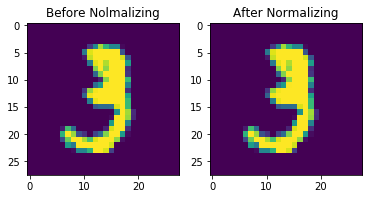

In [15]:
train_datagen = ImageDataGenerator(featurewise_center = True, 
                                   featurewise_std_normalization = True,
                                   rotation_range = 5,
                                   )
test_datagen = ImageDataGenerator(featurewise_center = True, featurewise_std_normalization = True)
train_datagen.fit(X_train)
test_datagen.fit(X_test)

fig, ax = plt.subplots(1,2)
img = X_train[10]
ax[0].imshow(img.reshape(28,28))
ax[0].set_title("Before Nolmalizing")
train_datagen.standardize(img.reshape(1,28,28,1))
ax[1].imshow(img.reshape(28,28))
ax[1].set_title("After Normalizing")
plt.show()

train_data_iter = train_datagen.flow(X_train,Y_train, batch_size = 64)
test_data_iter =  test_datagen.flow(X_test,Y_test, batch_size = 10000)

In [7]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

from keras.callbacks import ModelCheckpoint

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
lambd=0.01

model = get_model()

model.compile(loss=custom_loss(lambd, model, 64), optimizer=Adam(lr=0.003), metrics=['accuracy'])


CKPT = ModelCheckpoint(filepath = 'best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max', period=1)

cbacks = [CKPT]
  

H = model.fit_generator(train_data_iter, steps_per_epoch = 2000, epochs = 40, callbacks = cbacks, validation_data = test_data_iter.next(), verbose = 1)
  
print("Best Validation Accuracy : {}".format(np.max(H.history['val_acc'])))
  


W0903 07:06:59.643358 140297058178944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  
W0903 07:06:59.669891 140297058178944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0903 07:06:59.673365 140297058178944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0903 07:06:59.708356 140297058178944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)       

W0903 07:07:01.543606 140297058178944 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/40
2000/2000 [==============================] - 64s 32ms/step - loss: 0.4602 - acc: 0.8624 - val_loss: 0.0804 - val_acc: 0.9860

Epoch 00001: val_acc improved from -inf to 0.98600, saving model to best_model.hdf5
Epoch 2/40
2000/2000 [==============================] - 61s 30ms/step - loss: 0.3419 - acc: 0.8857 - val_loss: 0.0638 - val_acc: 0.9912

Epoch 00002: val_acc improved from 0.98600 to 0.99120, saving model to best_model.hdf5
Epoch 3/40
2000/2000 [==============================] - 61s 30ms/step - loss: 0.3350 - acc: 0.8889 - val_loss: 0.0742 - val_acc: 0.9898

Epoch 00003: val_acc did not improve from 0.99120
Epoch 4/40
2000/2000 [==============================] - 61s 30ms/step - loss: 0.3355 - acc: 0.8901 - val_loss: 0.0627 - val_acc: 0.9914

Epoch 00004: val_acc improved from 0.99120 to 0.99140, saving model to best_model.hdf5
Epoch 5/40
2000/2000 [==============================] - 60s 30ms/step - loss: 0.3381 - acc: 0.8904 - val_loss: 0.0635 - val_acc: 0.9930

Epoch 0

####Find out 25 misclassified images from the validation dataset and create an image gallery


*   Load best_model.hdf5 saved in previous step.
*   compile model, get testdata to x_val and y_val variables.

*   run model.predict on test data.
*   Loop over validation dataset and store misclassified image index into list. plot the missclassified images.


In [17]:

#load compile and predict.
model = get_model()
model.load_weights('best_model.hdf5')
model.compile(loss= 'categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

X_val,Y_val = test_data_iter.next()

Y_pred = model.predict(X_val)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_15 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_19 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_16 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_20 (Activation)   (None, 24, 24, 32)       

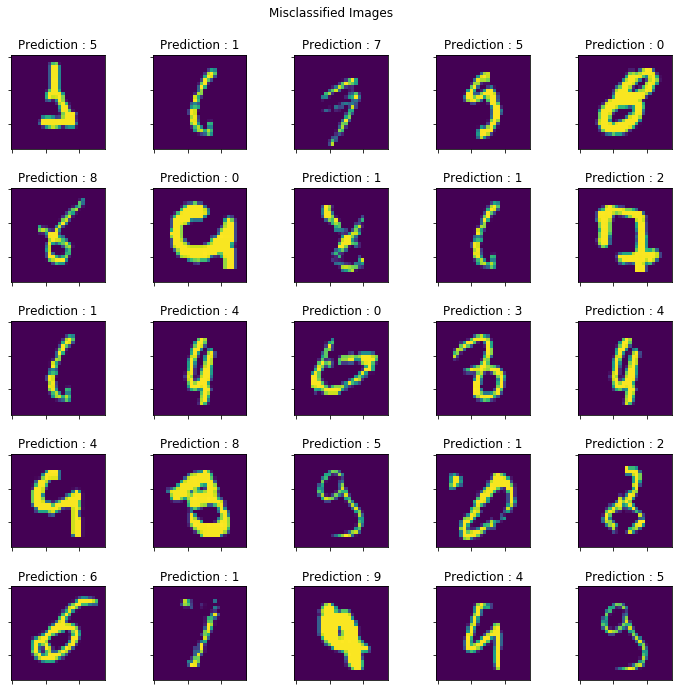

In [19]:
#Plot missclassified images.
misclassified_idx = []

for i in range(len(Y_val)):
  if np.argmax(Y_val[i])!= np.argmax(Y_pred[i]):
    misclassified_idx.append(i)

plt_idx = np.random.choice(misclassified_idx, 25)
fig, ax = plt.subplots(5,5,figsize = (10,10))
fig.tight_layout()
fig.suptitle('Misclassified Images')
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.92, wspace=None, hspace=None)
k = 0
for i in range(5):
  for j in range(5):
    img = X_val[plt_idx[k]].reshape(28,28)
    pred = np.argmax(Y_pred[plt_idx[k]])
    ax[i,j].set_xticklabels([])
    ax[i,j].set_yticklabels([])
    ax[i,j].imshow(img)
    ax[i,j].set_title("Prediction : {}".format(pred))
    k += 1
